

# Advanced Machine Learning and Artificial Intelligence: Anomalies Detection using Autoencoders


The goal of this notebook is to to detect illegitimate connections in a computer network using an **autoencoder** 

## Data set description

Data set for this project is from [The Third International Knowledge Discovery and Data Mining Tools Competition](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) at KDD-99, The Fifth International Conference on Knowledge Discovery and Data Mining. File `kddCupTrain.csv` with the data necessary for this project contains only one of multiple types of attacks (see below).  

The competition [task](http://kdd.ics.uci.edu/databases/kddcup99/task.html) was building a network intrusion detector capable of distinguishing "bad" connections, called intrusions or attacks, from "good" normal connections. This database contains a variety of intrusions simulated in a military network environment.

The original KDD training dataset consists of approximately 4,900,000 single connection vectors each of which contains 41 features and is labeled as either normal or an attack, with exactly one specific attack type. The simulated attacks fall in one of the following four categories:
1. Denial of Service Attack (DoS): is an attack in which the attacker makes some computing or memory resource too busy or too full to handle legitimate requests, or denies legitimate users access to a machine.
2. User to Root Attack (U2R): is a class in which the attacker starts out with access to a normal user account on the system (perhaps gained by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system.
3. Remote to Local Attack (R2L): occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine.
4. Probing Attack: is an attempt to gather information about a network of computers for the apparent purpose of circumventing its security controls.


Attacks contained in the dataset: 

Attack Category | Attack Type
--- | ---
DoS | back, land, neptune, <br>pod, smurf, teardrop
U2R | buffer_overflow, loadmodule, <br>perl, rootkit
R2L | ftp_write, guess_passwd, <br>imap, multihop, rhf, <br>spy, warezclient, warezmaster
Probe | portsweep, ipsweep, <br>satan, nmap

KDD-99 features can be classified into three groups:  
1) **Basic features**: this category encapsulates all the attributes that can be extracted from a TCP/IP connection. Most of these features leading to an implicit delay in detection.  
2) **Traffic features**: this category includes features that are computed with respect to a window interval and is divided into two groups:
* **"same host" features**: examine only the connections in the past 2 seconds that have the same destination host as the current connection, and calculate statistics related to protocol behavior, service, etc.
* **"same service" features**: examine only the connections in the past 2 seconds that have the same service as the current connection.  

These two types of "traffic" features are called time-based as opposed to the following connection-based type. 

* **"connection-based" features**: there are several types of slow probing attacks that scan the hosts (or ports) using a much larger time interval than 2 seconds, for example, one in every minute. As a result, these attacks do not produce intrusion patterns with a time window of 2 seconds. To detect such attacks the “same host” and “same service” features are  recalculated but based on the connection window of 100 connections rather than a time window of 2 seconds. These features are called **connection-based traffic features**.  

3) **Content features**: unlike most of the DoS and Probing attacks, the R2L and U2R attacks don’t have any frequent sequential intrusion patterns. This is because the DoS and Probing attacks involve many connections to some host(s) in a very short period of time. Unlike them, the R2L and U2R attacks are embedded in the data portions of the packets, and normally involve only a single connection. To detect these kinds of attacks, one needs some features in order to look for suspicious behavior in the data portion, e.g., number of failed login attempts. These features are called **content features**.

#### Table 1: Basic features of individual TCP connections.
nn | feature name |	description |	type
--:|------------|-----------|-----------
0 | duration | length (number of seconds) of the connection |	continuous
1 | protocol_type |	type of the protocol, e.g. tcp, udp, etc. |	symbolic
2 | service |	network service on the destination, e.g., http, telnet, etc. |	symbolic
3 | flag |	normal or error status of the connection |	symbolic 
4 | src_bytes |	number of data bytes from source to destination |	continuous
5 | dst_bytes |	number of data bytes from destination to source |	continuous
6 | land |	1 if connection is from/to the same host/port; 0 otherwise |	binary
7 | wrong_fragment |	number of "wrong" fragments |	continuous
8 | urgent |	number of urgent packets |	continuous

#### Table 2: Content features within a connection suggested by domain knowledge.
nn | feature name |	description |	type
---:|------------ | ------------ | --------
9 | hot |	number of "hot" indicators |	continuous
10 | num_failed_logins |	number of failed login attempts |	continuous
11 | logged_in |	1 if successfully logged in; 0 otherwise |	binary
12 | num_compromised |	number of "compromised" conditions |	continuous
13 | root_shell |	1 if root shell is obtained; 0 otherwise |	binary
14 | su_attempted |	1 if "su root" command attempted; 0 otherwise |	binary
15 | num_root |	number of "root" accesses |	continuous
16 | num_file_creations |	number of file creation operations |	continuous
17 | num_shells |	number of shell prompts |	continuous
18 | num_access_files |	number of operations on access control files |	continuous
19 | num_outbound_cmds |	number of outbound commands in an ftp session |	continuous
20 | is_hot_login |	1 if the login belongs to the "hot" list; 0 otherwise |	binary
21 | is_guest_login |	1 if the login is a "guest" login; 0 otherwise |	binary

#### Table 3: Traffic features computed using a two-second time window.
nn  | feature name |	description |	type
---:|------------ | ------------ | --------
22 | count |	number of connections to the same host as the current connection in the past two seconds |	continuous
 | | Note: The following  features refer to these same-host connections.	|
23 | serror_rate |	% of connections that have "SYN" errors |	continuous
24 | rerror_rate |	% of connections that have "REJ" errors |	continuous
25 | same_srv_rate |	% of connections to the same service |	continuous
26 | diff_srv_rate |	% of connections to different services |	continuous
27 | srv_count |	number of connections to the same service as the current connection in the past two seconds |	continuous
 |  | Note: The following features refer to these same-service connections.	|
28 | srv_serror_rate |	% of connections that have "SYN" errors |	continuous
29 | srv_rerror_rate |	% of connections that have "REJ" errors |	continuous
30 | srv_diff_host_rate |	% of connections to different hosts |	continuous
31 | dst_host_count |	number of connections from the same address to the same host as the current connection in the past two seconds |	continuous
32 | dst_host_srv_count | number of connections from the same host to the same service as the current connection in the past two seconds | continuous
 |  | Note: The following features refer to these same-host and same-service connections.	|
33 | dst_host_same_srv_rate | |	continuous
34 | dst_host_diff_srv_rate | |	continuous
35 | dst_host_same_src_port_rate | |	continuous
36 | dst_host_srv_diff_host_rate | |	continuous
37 | dst_host_serror_rate | |	continuous
38 | dst_host_srv_serror_rate | |	continuous
39 | dst_host_rerror_rate | |	continuous
40 | dst_host_srv_rerror_rate | |	continuous

The attribute labeled **41** in the data set is the **"Class"** attribute which indicates whether a given instance is a normal connection instance or an attack.


### 1. Preparing the data

#### 1.1. Reading data

Read the train dataset  `kddCupTrain.csv` from `kddCupData.zip` and check it for missing values.

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import h5py
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 2
LABELS = ["Normal", "Fraud"]

import os
from google.colab import drive

drive.mount("/content/drive/", force_remount=True)
os.chdir('/content/drive/My Drive/Anomaly Detection')


Mounted at /content/drive/


In [ ]:
kddCupTrain = pd.read_csv('kddCupTrain.csv',header=None)
print("Shape of kddCupTrain: ",kddCupTrain.shape)
print("There are any missing values: ", kddCupTrain.isnull().values.any())
print(kddCupTrain.head(3))

Shape of kddCupTrain:  (985262, 42)
There are any missing values:  False
   0    1     2   3    4      5   6   ...   35   36   37   38   39   40       41
0   0  tcp  http  SF  215  45076   0  ...  0.0  0.0  0.0  0.0  0.0  0.0  normal.
1   0  tcp  http  SF  162   4528   0  ...  1.0  0.0  0.0  0.0  0.0  0.0  normal.
2   0  tcp  http  SF  236   1228   0  ...  0.5  0.0  0.0  0.0  0.0  0.0  normal.

[3 rows x 42 columns]


In [ ]:
kddCupTrain.shape

(985262, 42)

In [ ]:
kddCupTrain.rename(columns={41:'Class'}, inplace=True)
kddCupTrain['Class'] = np.where(kddCupTrain['Class'] == 'normal.', 0, 1)

In [ ]:
kddCupTrain['Class'].value_counts()

0    972781
1     12481
Name: Class, dtype: int64

1.2. Remove the uninformative columns

Look at summaries of numeric features.

In [ ]:
pd.set_option('display.max_columns', None)
print(kddCupTrain.describe(percentiles=[]))

                   0             4             5              6         7  \
count  985262.000000  9.852620e+05  9.852620e+05  985262.000000  985262.0   
mean      215.078631  1.459258e+03  3.193730e+03       0.000007       0.0   
std      1343.633640  1.097984e+05  3.401613e+04       0.002665       0.0   
min         0.000000  0.000000e+00  0.000000e+00       0.000000       0.0   
50%         0.000000  2.300000e+02  4.060000e+02       0.000000       0.0   
max     58329.000000  8.958152e+07  1.173059e+07       1.000000       0.0   

                   8              9             10             11  \
count  985262.000000  985262.000000  985262.000000  985262.000000   
mean        0.000036       0.048908       0.000097       0.710185   
std         0.015897       0.926008       0.013058       0.453677   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
max        14.000000      77.000000       4.00

In [ ]:
columnsList = [7,19]
kddCupTrain.drop(columnsList, axis=1, inplace=True)

In [ ]:
kddCupTrain = pd.get_dummies(data=kddCupTrain, columns=[1,2,3])

In [ ]:
kddCupTrain.head(2)

,0,4,5,6,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,Class,1_icmp,1_tcp,1_udp,2_IRC,2_X11,2_auth,2_ctf,2_domain,2_domain_u,2_eco_i,2_ecr_i,2_finger,2_ftp,2_ftp_data,2_gopher,2_http,2_imap4,2_link,2_mtp,2_name,2_ntp_u,2_other,2_pop_3,2_private,2_red_i,2_remote_job,2_rje,2_shell,2_smtp,2_ssh,2_telnet,2_tftp_u,2_tim_i,2_time,2_urh_i,2_urp_i,2_whois,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,0,215,45076,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,162,4528,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
scaler = preprocessing.StandardScaler()
features = kddCupTrain.drop(['Class'],axis = 1)
X = scaler.fit_transform(features)

In [ ]:
data = pd.DataFrame(X, index=features.index, columns=features.columns)
data['Class'] = kddCupTrain['Class']

In [ ]:
X_train_split, X_test_split = train_test_split(data, test_size=0.2,
                                   stratify=data['Class'], 
                                   random_state=RANDOM_SEED)

In [ ]:
y_train = X_train_split['Class']
X_train = X_train_split.drop(['Class'], axis=1)

y_test = X_test_split['Class']
X_test = X_test_split.drop(['Class'], axis=1)
print('Train: shape X',X_train.shape,', shape Y',y_train.shape)
print('Test: shape X',X_test.shape,', shape Y',y_test.shape)

Train: shape X (788209, 83) , shape Y (788209,)
Test: shape X (197053, 83) , shape Y (197053,)


Select the "normal" transactions from the training data to train autoencoder on them.

In [ ]:
X_trainNorm = X_train[y_train == 0]
X_trainNorm_val = X_trainNorm.values # Only values, axis labels removed. This is input for the Autoencoder
X_testNorm_val = X_test[y_test == 0].values # The validation data

In [ ]:
X_trainNorm_val.shape

(778224, 83)

Creating the model

This autoencoder contains fully connected layers with 14, 7, 14 and 29 neurons, respectively. The first two layers make encoder, the last two make decoder.

Training is done with  L1  regularization.

Set parameters:

In [ ]:
input_dim = X_trainNorm_val.shape[1]
layer1_dim = 30
encoder_dim = 15

In [ ]:
input_layer = Input(shape=(input_dim, ))

encoder1 = Dense(layer1_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder2 = Dense(encoder_dim, activation="relu")(encoder1)
decoder1 = Dense(layer1_dim, activation='tanh')(encoder2)
decoder2 = Dense(input_dim, activation='linear')(decoder1)
print('input_layer: ',input_layer)
print('encoder1',encoder1)
print('encoder2',encoder2)
print('decoder1',decoder1)
print('decoder2',decoder2)

input_layer:  Tensor("input_1:0", shape=(None, 83), dtype=float32)
encoder1 Tensor("dense/Tanh:0", shape=(None, 30), dtype=float32)
encoder2 Tensor("dense_1/Relu:0", shape=(None, 15), dtype=float32)
decoder1 Tensor("dense_2/Tanh:0", shape=(None, 30), dtype=float32)
decoder2 Tensor("dense_3/BiasAdd:0", shape=(None, 83), dtype=float32)


In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoder2)
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 83)]              0         
_________________________________________________________________
dense (Dense)                (None, 30)                2520      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 83)                2573      
Total params: 6,038
Trainable params: 6,038
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 50
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0) # 'patience' number of not improving epochs
history = autoencoder.fit(X_trainNorm_val, X_trainNorm_val,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_testNorm_val, X_testNorm_val),
                    verbose=1,
                    callbacks=[checkpointer, #tensorboard, 
                               earlystopping]).history

Epoch 1/50
24320/24320 [==============================] - 36s 1ms/step - loss: 0.4125 - val_loss: 0.3083
Epoch 2/50
24320/24320 [==============================] - 35s 1ms/step - loss: 0.3539 - val_loss: 0.2873
Epoch 3/50
24320/24320 [==============================] - 35s 1ms/step - loss: 0.3404 - val_loss: 0.2810
Epoch 4/50
24320/24320 [==============================] - 36s 1ms/step - loss: 0.3331 - val_loss: 0.2713
Epoch 5/50
24320/24320 [==============================] - 35s 1ms/step - loss: 0.3281 - val_loss: 0.2659
Epoch 6/50
24320/24320 [==============================] - 35s 1ms/step - loss: 0.3234 - val_loss: 0.2630
Epoch 7/50
24320/24320 [==============================] - 35s 1ms/step - loss: 0.3195 - val_loss: 0.2600
Epoch 8/50
24320/24320 [==============================] - 35s 1ms/step - loss: 0.3162 - val_loss: 0.2592
Epoch 9/50
24320/24320 [==============================] - 37s 2ms/step - loss: 0.3145 - val_loss: 0.2554
Epoch 10/50
24320/24320 [==============================

In [ ]:
autoencoder = load_model('model.h5')

In [ ]:
from IPython.display import IFrame
IFrame('https://shiny.ilykei.com/LVShiny/Autoencoders/', 800, 1220)

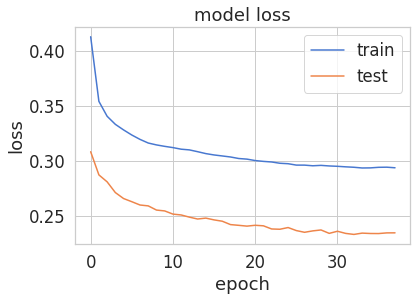

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [ ]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

((197053, 83), (197053, 83))

In [ ]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
error_df = pd.DataFrame({'reconstruction_error': testMSE,'true_class': y_test})
error_df.head()

,reconstruction_error,true_class
965348,0.003695,0
663604,0.050393,0
312501,0.001713,0
611188,0.012396,0
588046,0.001037,0


In [ ]:
error_df.shape

(197053, 2)

In [ ]:
error_df.reconstruction_error.describe()

count    197053.000000
mean          0.328676
std          21.179712
min           0.000392
25%           0.002081
50%           0.005360
75%           0.024743
max        6064.416455
Name: reconstruction_error, dtype: float64

Reconstruction errors for normal transactions

Plot histogram of errors of reconstruction for normal data.

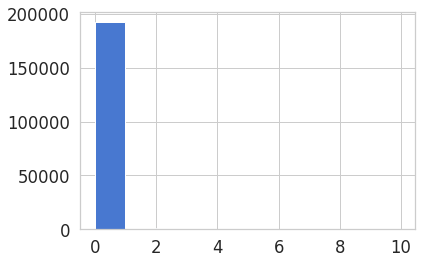

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
ax.hist(normal_error_df.reconstruction_error.values, bins=10);

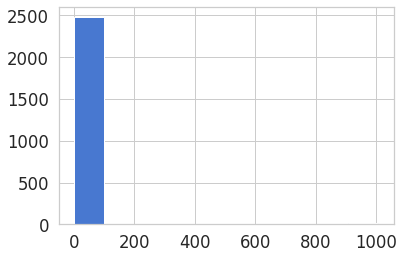

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
ax.hist(fraud_error_df.reconstruction_error.values, bins=10);

In [ ]:
from sklearn.metrics import (confusion_matrix, auc, roc_curve, cohen_kappa_score, accuracy_score)

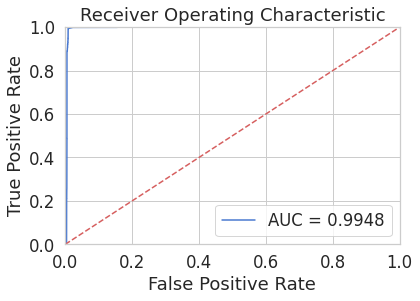

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


In [ ]:
threshold = normal_error_df.reconstruction_error.quantile(q=0.995)
threshold

1.4282159577419753

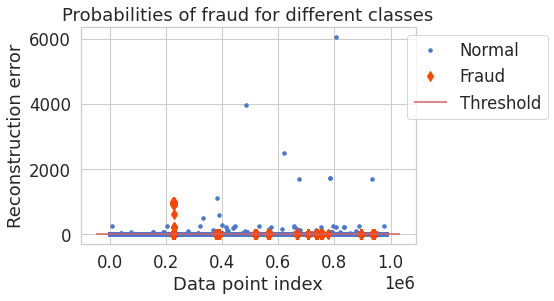

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    if name == 1:
        MarkerSize = 7
        Color = 'orangered'
        Label = 'Fraud'
        Marker = 'd'
    else:
        MarkerSize = 3.5
        Color = 'b'
        Label = 'Normal'
        Marker = 'o'
    ax.plot(group.index, group.reconstruction_error, 
            linestyle='',
            color=Color,
            label=Label,
            ms=MarkerSize,
            marker=Marker)
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend(loc='upper left', bbox_to_anchor=(0.95, 1))
plt.title("Probabilities of fraud for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

[[193300   1257]
 [   242   2254]]


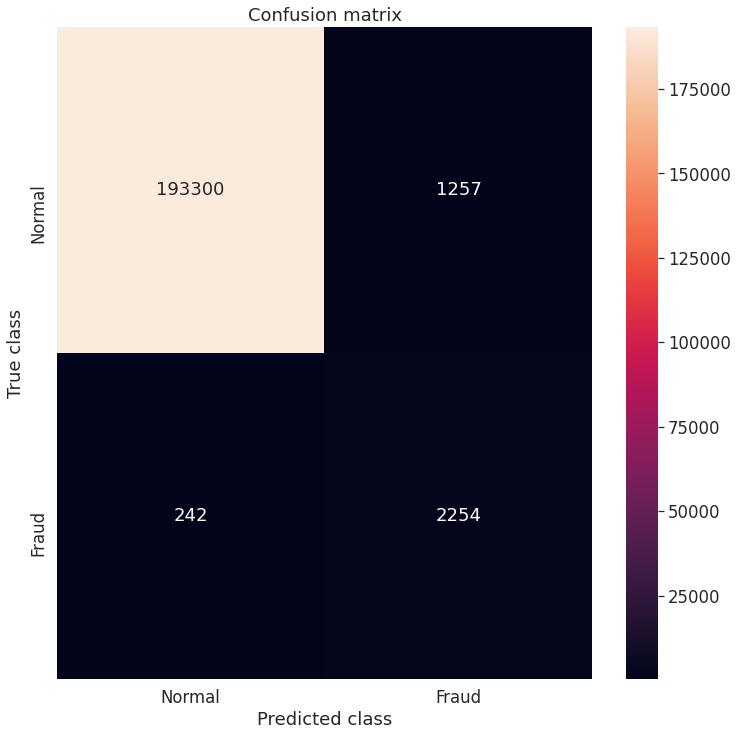

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
print(conf_matrix)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
cohen_kappa_score(error_df.true_class, y_pred),accuracy_score(error_df.true_class, y_pred)

(0.7467073147665799, 0.9923929095218038)

## Prepare predictions

In [ ]:
kddCupTest = pd.read_csv('kddCupTest.csv', header=None)
print(kddCupTest.head(3))

   0    1        2   3     4      5   6   7   8   9   10  11  12  13  14  15  \
0   0  tcp     http  SF   230  10066   0   0   0   0   0   1   0   0   0   0   
1   0  udp  private  SF   105    145   0   0   0   0   0   0   0   0   0   0   
2   1  tcp     smtp  SF  1888    374   0   0   0   0   0   1   0   0   0   0   

   16  17  18  19  20  21  22  23   24   25   26   27   28   29   30   31  \
0   0   0   0   0   0   0  19  20  0.0  0.0  0.0  0.0  1.0  0.0  0.1  255   
1   0   0   0   0   0   0   1   1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  255   
2   0   0   0   0   0   0   1   1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  255   

    32    33    34   35   36   37   38   39   40  
0  255  1.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
1  227  0.89  0.01  0.0  0.0  0.0  0.0  0.0  0.0  
2  174  0.68  0.03  0.0  0.0  0.0  0.0  0.0  0.0  


In [ ]:
columnsList = [7,19]
kddCupTest.drop(columnsList, axis=1, inplace=True)
kddCupTest = pd.get_dummies(data=kddCupTest, columns=[1,2,3])

In [ ]:
test_cols = kddCupTest.columns.tolist()
train_cols = features.columns.tolist()

In [ ]:
kddCupTest['3_SH'] = 0
kddCupTest['2_tftp_u'] = 0
kddCupTest = kddCupTest[train_cols]

In [ ]:
X_test = scaler.transform(kddCupTest)

In [ ]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

((196557, 83), (196557, 83))

In [ ]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')

result_df = pd.DataFrame({'reconstruction_error': testMSE})

In [ ]:
result_df.head()

,reconstruction_error
0,0.001541
1,0.001910
2,0.009978
3,0.003676
4,0.017384


In [ ]:
result_df.to_csv('filename.csv')